In [8]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import pandas as pd

In [9]:
file_id = "1Q6r8u1r6hjvamB4J3SGtlaErfZxEsz7T"
export_url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx"
response = requests.get(export_url)
excel_data = BytesIO(response.content)
df = pd.read_excel(excel_data, engine='openpyxl')
styled_df = df.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])
display(styled_df)


,Timestamp,Role,Other_Role,Job_Level,Experience,Industry,Gender,Tech_Stack,Other_Tech_Stack,Gross_Salary,Benefits,Work_Setup,Employer_Type
0,2023-10-02 20:02:52.903000,Data Analyst,nan,Mid-Level eg Data Analyst,1yr-2yrs,Education,Female,"Python, SQL, SAS/SPSS, Tableau, Excel",nan,nan,Other Company specific Perks not listed above,Full remote,Startup
1,2023-10-02 16:41:24.075000,Data Analyst,nan,Junior eg Junior Data Analyst,1yr-2yrs,Fintech,Female,"Python, SQL, Excel",nan,187000,"Health Insurance, Pension, Mobile Phone",Full remote,Established
2,2023-10-02 19:24:44.676000,Data Analyst,nan,Junior eg Junior Data Analyst,1yr-2yrs,Health,Female,"Power BI, Excel",nan,190000,"Health Insurance, Pension, Mobile Credit Top-up",Hybrid- I need to be in the office specific days in a week,Established
3,2023-10-02 16:42:03.054000,Data Analyst,nan,Intern,Beginner,Education,Male,"Python, SQL, Tableau, Power BI, Excel, Google Sheets",nan,15000,Bonus,Full remote,Startup
4,2023-10-02 17:59:30.959000,Data Analyst,nan,Intern,Beginner,Azubi Africa,Male,"Python, SQL, R, SAS/SPSS, Tableau, Power BI, Microsoft Azure, Google Data Studio, Excel, Google Sheets",nan,0,"Health Insurance, Stocks, Equity, Mobile Phone, Mobile Credit Top-up, Monthly Vouchers",Full remote,Established
5,2023-10-02 18:00:46.645000,Data Analyst,nan,Intern,Beginner,Azubi Africa,Male,"Python, SQL, R, SAS/SPSS, Tableau, Power BI, Microsoft Azure, Google Data Studio, Excel, Google Sheets",nan,0,"Health Insurance, Stocks, Equity, Mobile Phone, Mobile Credit Top-up, Fuel Allowance, Monthly Vouchers",Full remote,Established
6,2023-10-03 10:25:35.148000,Other,Academic Director,Manager eg Manager of Analytics,Over 7 Yrs,Education,Female,Excel,nan,500000,Health Insurance,Full Office,Established
7,2023-10-02 18:33:15.548000,Other,Data Manager (Digital),Mid-Level eg Data Analyst,1yr-2yrs,NGO,Male,"Python, R, Power BI, Google Data Studio, Excel, Google Sheets",nan,375000,"Health Insurance, Mobile Credit Top-up",Hybrid-I choose my days to go the office,Established
8,2023-10-02 17:19:13.565000,Data Engineer,nan,Mid-Level eg Data Analyst,3yrs-5yrs,Fintech,Male,"Python, SQL, Microsoft Azure",nan,335000,"Health Insurance, Mobile Credit Top-up, Bonus",Full remote,Established
9,2023-10-03 14:29:35.245000,Data Analyst,nan,Manager eg Manager of Analytics,Over 5 Yrs,Telecommunications,Female,"Python, SQL, Power BI, Excel",nan,310000,"Health Insurance, Pension, Mobile Phone, Mobile Credit Top-up, Bonus, Fuel Allowance, Monthly Vouchers",Hybrid- I need to be in the office specific days in a week,Established


In [10]:
df.info(4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Timestamp         173 non-null    datetime64[ns]
 1   Role              173 non-null    object        
 2   Other_Role        42 non-null     object        
 3   Job_Level         173 non-null    object        
 4   Experience        173 non-null    object        
 5   Industry          171 non-null    object        
 6   Gender            173 non-null    object        
 7   Tech_Stack        173 non-null    object        
 8   Other_Tech_Stack  18 non-null     object        
 9   Gross_Salary      167 non-null    object        
 10  Benefits          173 non-null    object        
 11  Work_Setup        173 non-null    object        
 12  Employer_Type     173 non-null    object        
dtypes: datetime64[ns](1), object(12)
memory usage: 17.7+ KB


In [11]:
#CHECK FOR THE FREQUENCY OF SPECIFIC VALUES IN THE COLUMN
df["Role"].value_counts()  


Role
Data Analyst      112
Other              37
Data Scientist     16
Data Engineer       8
Name: count, dtype: int64

In [12]:
df["Job_Level"].value_counts()

Job_Level
Mid-Level  eg Data Analyst              73
Junior  eg Junior Data Analyst          50
Intern                                  31
Senior Level  eg Senior Data Analyst    11
Manager eg Manager of Analytics          6
Lead eg Lead Analyst                     2
Name: count, dtype: int64

In [13]:
df["Industry"].value_counts()

Industry
Fintech                 17
Health                  11
FMCG                     8
NGO                      6
Retail                   5
                        ..
Telecommunications       1
Logistics                1
Market Research          1
Fintech and IT           1
Manufacturing (FMCG)     1
Name: count, Length: 97, dtype: int64

In [36]:
df["Gender"].value_counts()

Gender
Female    84
Male      83
Name: count, dtype: int64

In [15]:
df["Tech_Stack"].value_counts()

Tech_Stack
Power BI, Excel                                                                                        11
Python, SQL, Power BI, Excel                                                                           10
SQL, Power BI, Excel                                                                                    9
Excel                                                                                                   7
SQL, Power BI, Excel, Google Sheets                                                                     6
                                                                                                       ..
Python, SQL, SAS/SPSS, Tableau, Power BI, Microsoft Azure, Google Data Studio, Excel, Google Sheets     1
Python, SQL, Tableau, Power BI, Microsoft Azure, Excel, Google Sheets                                   1
SQL, Google Data Studio, Google Sheets                                                                  1
R, Power BI, Google Sheets, Other  

In [16]:
df["Gross_Salary"].value_counts()

Gross_Salary
100000    10
0          9
25000      6
200000     6
40000      6
          ..
38000      1
115000     1
116000     1
97000      1
90100      1
Name: count, Length: 77, dtype: int64

In [17]:
df["Work_Setup"].value_counts()

Work_Setup
Full Office                                                   93
Full remote                                                   35
Hybrid- I need to be in the office specific days in a week    24
Hybrid-I choose my days to go the office                      21
Name: count, dtype: int64

In [18]:
df["Employer_Type"].value_counts()

Employer_Type
Established    123
Startup         50
Name: count, dtype: int64

In [19]:
# CHECK FOR MISSING VALUES IN THE DATA FRAME 
df.isnull().sum()

Timestamp             0
Role                  0
Other_Role          131
Job_Level             0
Experience            0
Industry              2
Gender                0
Tech_Stack            0
Other_Tech_Stack    155
Gross_Salary          6
Benefits              0
Work_Setup            0
Employer_Type         0
dtype: int64

In [53]:
#CONVERSION OF DATA TYPE IN THE GROSS SALARY COLUMN BY CONVERTING NON-NUMERIC VALUES TO NaN VALUES
df['Gross_Salary'] = pd.to_numeric(df['Gross_Salary'],errors = 'coerce')

In [55]:
#CONVERTING ANY ZERO VALUE IN THE GROSS SALARY COLUMN WITH NaN(NOT a NUMBER) VALUE
df['Gross_Salary'] = df['Gross_Salary'].replace(0, np.nan)

In [56]:
df

,Timestamp,Role,Other_Role,Job_Level,Experience,Industry,Gender,Tech_Stack,Other_Tech_Stack,Gross_Salary,Benefits,Work_Setup,Employer_Type
0,2023-10-02 20:02:52.903,Data Analyst,NaN,Mid-Level eg Data Analyst,1yr-2yrs,Education,Female,"Python, SQL, SAS/SPSS, Tableau, Excel",NaN,NaN,Other Company specific Perks not listed above,Full remote,Startup
1,2023-10-02 16:41:24.075,Data Analyst,NaN,Junior eg Junior Data Analyst,1yr-2yrs,Fintech,Female,"Python, SQL, Excel",NaN,187000.0,"Health Insurance, Pension, Mobile Phone",Full remote,Established
2,2023-10-02 19:24:44.676,Data Analyst,NaN,Junior eg Junior Data Analyst,1yr-2yrs,Health,Female,"Power BI, Excel",NaN,190000.0,"Health Insurance, Pension, Mobile Credit Top-up",Hybrid- I need to be in the office specific da...,Established
3,2023-10-02 16:42:03.054,Data Analyst,NaN,Intern,Beginner,Education,Male,"Python, SQL, Tableau, Power BI, Excel, Google ...",NaN,15000.0,Bonus,Full remote,Startup
4,2023-10-02 17:59:30.959,Data Analyst,NaN,Intern,Beginner,Azubi Africa,Male,"Python, SQL, R, SAS/SPSS, Tableau, Power BI, M...",NaN,NaN,"Health Insurance, Stocks, Equity, Mobile Phone...",Full remote,Established
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-06 05:08:41.326,Data Analyst,NaN,Junior eg Junior Data Analyst,3yrs-5yrs,AID,Male,"Python, Excel, Google Sheets, Other",NaN,312000.0,"Health Insurance, Pension",Full remote,Established
169,2024-05-06 13:23:37.592,Data Analyst,NaN,Mid-Level eg Data Analyst,3yrs-5yrs,Production and Retail,Female,"Power BI, Excel",NaN,100000.0,Health Insurance,Full Office,Established
170,2024-05-06 14:07:25.615,Data Analyst,NaN,Intern,1yr-2yrs,Taxation,Male,"Python, SQL, Power BI, Google Data Studio, Exc...",NaN,25000.0,Other Company specific Perks not listed above,Full Office,Established
171,2024-05-06 14:57:56.276,Data Analyst,NaN,Intern,1yr-2yrs,Health,Male,"R, Power BI, Other",Stata,18000.0,Bonus,Hybrid- I need to be in the office specific da...,Startup


In [57]:
#DROPPING NULL VALUES
df.dropna(subset = ['Gross_Salary'], inplace=True)

In [58]:
df

,Timestamp,Role,Other_Role,Job_Level,Experience,Industry,Gender,Tech_Stack,Other_Tech_Stack,Gross_Salary,Benefits,Work_Setup,Employer_Type
1,2023-10-02 16:41:24.075,Data Analyst,NaN,Junior eg Junior Data Analyst,1yr-2yrs,Fintech,Female,"Python, SQL, Excel",NaN,187000.0,"Health Insurance, Pension, Mobile Phone",Full remote,Established
2,2023-10-02 19:24:44.676,Data Analyst,NaN,Junior eg Junior Data Analyst,1yr-2yrs,Health,Female,"Power BI, Excel",NaN,190000.0,"Health Insurance, Pension, Mobile Credit Top-up",Hybrid- I need to be in the office specific da...,Established
3,2023-10-02 16:42:03.054,Data Analyst,NaN,Intern,Beginner,Education,Male,"Python, SQL, Tableau, Power BI, Excel, Google ...",NaN,15000.0,Bonus,Full remote,Startup
6,2023-10-03 10:25:35.148,Other,Academic Director,Manager eg Manager of Analytics,Over 7 Yrs,Education,Female,Excel,NaN,500000.0,Health Insurance,Full Office,Established
7,2023-10-02 18:33:15.548,Other,Data Manager (Digital),Mid-Level eg Data Analyst,1yr-2yrs,NGO,Male,"Python, R, Power BI, Google Data Studio, Excel...",NaN,375000.0,"Health Insurance, Mobile Credit Top-up",Hybrid-I choose my days to go the office,Established
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2024-05-06 05:08:41.326,Data Analyst,NaN,Junior eg Junior Data Analyst,3yrs-5yrs,AID,Male,"Python, Excel, Google Sheets, Other",NaN,312000.0,"Health Insurance, Pension",Full remote,Established
169,2024-05-06 13:23:37.592,Data Analyst,NaN,Mid-Level eg Data Analyst,3yrs-5yrs,Production and Retail,Female,"Power BI, Excel",NaN,100000.0,Health Insurance,Full Office,Established
170,2024-05-06 14:07:25.615,Data Analyst,NaN,Intern,1yr-2yrs,Taxation,Male,"Python, SQL, Power BI, Google Data Studio, Exc...",NaN,25000.0,Other Company specific Perks not listed above,Full Office,Established
171,2024-05-06 14:57:56.276,Data Analyst,NaN,Intern,1yr-2yrs,Health,Male,"R, Power BI, Other",Stata,18000.0,Bonus,Hybrid- I need to be in the office specific da...,Startup


In [61]:
#CHECKING THE TOP 10 ROLES WITH THE HIGHEST GROSS SALARY
df[["Gross_Salary", "Work_Setup", "Gender","Role", "Tech_Stack", "Experience", "Job_Level", "Industry", "Employer_Type"]].nlargest(10, "Gross_Salary")

,Gross_Salary,Work_Setup,Gender,Role,Tech_Stack,Experience,Job_Level,Industry,Employer_Type
6,500000.0,Full Office,Female,Other,Excel,Over 7 Yrs,Manager eg Manager of Analytics,Education,Established
105,450000.0,Full remote,Male,Other,"Python, SQL, Power BI, Excel, Google Sheets",3yrs-5yrs,Mid-Level eg Data Analyst,Media,Established
145,450000.0,Hybrid- I need to be in the office specific da...,Male,Data Scientist,"Python, SQL, R, SAS/SPSS, Tableau, Power BI, E...",Over 7 Yrs,Senior Level eg Senior Data Analyst,Agriculture,Established
164,400000.0,Full remote,Male,Data Analyst,"Python, SQL, Tableau, Power BI, Excel",Beginner,Junior eg Junior Data Analyst,Health,Established
7,375000.0,Hybrid-I choose my days to go the office,Male,Other,"Python, R, Power BI, Google Data Studio, Excel...",1yr-2yrs,Mid-Level eg Data Analyst,NGO,Established
8,335000.0,Full remote,Male,Data Engineer,"Python, SQL, Microsoft Azure",3yrs-5yrs,Mid-Level eg Data Analyst,Fintech,Established
168,312000.0,Full remote,Male,Data Analyst,"Python, Excel, Google Sheets, Other",3yrs-5yrs,Junior eg Junior Data Analyst,AID,Established
9,310000.0,Hybrid- I need to be in the office specific da...,Female,Data Analyst,"Python, SQL, Power BI, Excel",Over 5 Yrs,Manager eg Manager of Analytics,Telecommunications,Established
55,300000.0,Full remote,Female,Data Analyst,"Power BI, Excel",3yrs-5yrs,Mid-Level eg Data Analyst,Development - INGO,Established
10,280000.0,Hybrid- I need to be in the office specific da...,Male,Data Engineer,"Python, SQL, Other",3yrs-5yrs,Mid-Level eg Data Analyst,Banking,Established


In [64]:
#CHECKING TOP 10 ROLES WITH LOWEST GROSS SALARIES
df[["Gross_Salary", "Work_Setup", "Gender","Role", "Tech_Stack", "Experience", "Job_Level", "Industry", "Employer_Type"]].nsmallest(10, "Gross_Salary")

,Gross_Salary,Work_Setup,Gender,Role,Tech_Stack,Experience,Job_Level,Industry,Employer_Type
117,1000.0,Full remote,Male,Data Analyst,Python,Beginner,Intern,Graphic design,Established
47,5000.0,Full remote,Male,Data Analyst,"Python, SQL, R, Tableau, Power BI, Excel, Goog...",Beginner,Junior eg Junior Data Analyst,Engineering,Startup
3,15000.0,Full remote,Male,Data Analyst,"Python, SQL, Tableau, Power BI, Excel, Google ...",Beginner,Intern,Education,Startup
46,15000.0,Full remote,Female,Data Analyst,Other,3yrs-5yrs,Junior eg Junior Data Analyst,People and Technology,Established
73,15000.0,Full Office,Female,Data Analyst,"Python, SQL, Tableau, Power BI, Excel, Google ...",Beginner,Junior eg Junior Data Analyst,Marketing,Startup
118,15000.0,Full Office,Female,Data Analyst,"Excel, Google Sheets",1yr-2yrs,Intern,Wholesale and Retail,Established
171,18000.0,Hybrid- I need to be in the office specific da...,Male,Data Analyst,"R, Power BI, Other",1yr-2yrs,Intern,Health,Startup
122,20000.0,Full Office,Male,Data Analyst,"Python, SQL, Tableau, Power BI, Excel, Google ...",1yr-2yrs,Intern,eMOBILITY,Startup
87,21000.0,Hybrid- I need to be in the office specific da...,Male,Data Analyst,"SQL, SAS/SPSS, Power BI, Excel",1yr-2yrs,Intern,Non-profit,Established
45,25000.0,Full Office,Male,Data Analyst,"SQL, R, Tableau, Excel, Google Sheets",Beginner,Intern,Fast Moving Consumer Goods,Startup


**STATISTICAL OVERVIEW OF THE GROSS SALARY AND ROLES**

In [69]:
# MEAN OF THE GROSS SALARY
df["Gross_Salary"].mean()

120116.6129032258

In [70]:
#MEDIAN GROSS SALARY
df["Gross_Salary"].median()

97200.0

In [73]:
#MODE OF THE GROSS SALARY
df["Gross_Salary"].mode()

0    100000.0
Name: Gross_Salary, dtype: float64

In [75]:
#checking for statistics of specific roles and gross salary
specific_role=df.groupby(["Role"])

In [78]:
#MEDIAN OF GROSS SALARY OF SPECIFIC ROLES
specific_role["Gross_Salary"].median()

Role
Data Analyst       94500.0
Data Engineer     205000.0
Data Scientist     80000.0
Other             100000.0
Name: Gross_Salary, dtype: float64

In [79]:
#MEAN GROSS SALARY OF SPECIFIC ROLES
specific_role["Gross_Salary"].mean()

Role
Data Analyst      109850.000000
Data Engineer     193125.000000
Data Scientist    131300.000000
Other             130153.571429
Name: Gross_Salary, dtype: float64

In [84]:
#TOP 5 GROSS SALARY PER EACH ROLE
specific_role["Gross_Salary"].nlargest(5)

Role               
Data Analyst    164    400000.0
                168    312000.0
                9      310000.0
                55     300000.0
                94     270000.0
Data Engineer   8      335000.0
                10     280000.0
                135    270000.0
                129    240000.0
                86     170000.0
Data Scientist  145    450000.0
                114    250000.0
                92     140000.0
                88     130000.0
                48      80000.0
Other           6      500000.0
                105    450000.0
                7      375000.0
                111    201500.0
                124    200000.0
Name: Gross_Salary, dtype: float64

In [85]:
#LEAST 5 GROSS SALARY PER EACH ROLE
specific_role["Gross_Salary"].nsmallest(5)

Role               
Data Analyst    117      1000.0
                47       5000.0
                3       15000.0
                46      15000.0
                73      15000.0
Data Engineer   43      30000.0
                158     65000.0
                20     155000.0
                86     170000.0
                129    240000.0
Data Scientist  84      35000.0
                79      38000.0
                39      40000.0
                53      70000.0
                48      80000.0
Other           89      25000.0
                41      30000.0
                95      35000.0
                37      50000.0
                70      60000.0
Name: Gross_Salary, dtype: float64

**PERCENTAGE OF ROLES THAT WORK IN FULL OFFICE**


In [86]:
specific_role["Work_Setup"].apply(lambda x: x.str.contains("Full Office").sum())

Role
Data Analyst      59
Data Engineer      3
Data Scientist     6
Other             22
Name: Work_Setup, dtype: int64

**PERCENTAGE OF ROLES THAT WORK FULLY REMOTE**

In [87]:
specific_role["Work_Setup"].apply(lambda x: x.str.contains("Full remote").sum())

Role
Data Analyst      14
Data Engineer      3
Data Scientist     1
Other              4
Name: Work_Setup, dtype: int64

**PERCENTAGE OF ROLES THAT WORK IN HYBRID SET-UP**

In [88]:
specific_role["Work_Setup"].apply(lambda x: x.str.contains("Hybrid- I need to be in the office specific days in a week").sum())

Role
Data Analyst      16
Data Engineer      1
Data Scientist     2
Other              4
Name: Work_Setup, dtype: int64

**PREFFERED EMPLOYMENT TYPES(OPTIONS) PER ROLES**

In [89]:
specific_role["Employer_Type"].apply(lambda x: x.str.contains("Established").sum())

Role
Data Analyst      78
Data Engineer      7
Data Scientist     7
Other             24
Name: Employer_Type, dtype: int64

In [90]:
specific_role["Employer_Type"].apply(lambda x: x.str.contains("Startup").sum())

Role
Data Analyst      24
Data Engineer      1
Data Scientist     3
Other             11
Name: Employer_Type, dtype: int64

**ROLES VS. GROSS SALARY VISUALIZED**


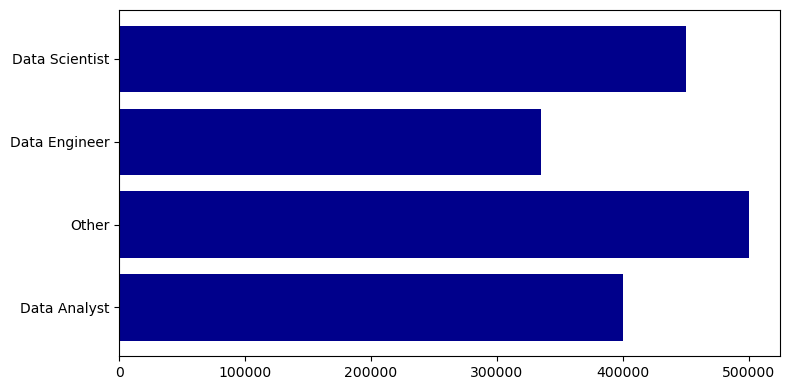

In [103]:
plt.figure(figsize=(8,4))
plt.barh(df["Role"], df["Gross_Salary"], color="darkblue")
plt.xlabel=("Role")
plt.ylabel=("Gross_Salary")
plt.title=("Roles vs. Gross Salary")
plt.tight_layout()
plt.show()

**GENDER VS.GROSS SALARY VISUALIZED**

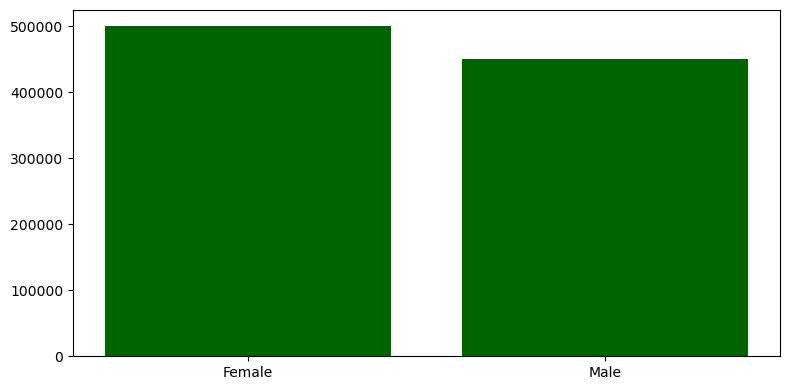

In [138]:
plt.figure(figsize=(8,4))
plt.bar(df["Gender"], df["Gross_Salary"], color="darkgreen")
plt.xlabel=("Gender")
plt.ylabel=("Gross_Salary")
plt.title=("Gender vs. Gross Salary")
plt.tight_layout()
plt.show()

**OBSERVASION**

The Analysis highlights a comparison of Gross salary across the Tech Profession in the Kenyan Job Market. Specifically, it narrows down to professions in Data Science, Data Engineering, Data Analysis and others Roles such as Data managers, Business Intelligence Analysts, Data Security and Risk analysis personnel. 
The other roles in Tech space attract a significant amount of Gross Salary as compared to data science, data engineering and data analyst roles. 
The female laborforce attracts a significant higher Gross Salary compared to the male counterparts. 

